# CSE620 Mini-Project 2: Simulated Annealing

## Section 0: Setup
---

The following code snippet will ensure that you have all necessary packages in your environment.

In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 787.6 kB/s eta 0:00:0000:01m
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.7 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.2.0
    Uninstalling contourpy-1.2.0:
      Successfully uninstalled contourpy-1.2.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependen

In [2]:
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from problem import TravelingSalesmanProblem  # Moved all of the problem representation related code into seperate file /include/problem
from optimizer import Schedule, simulated_annealing, hill_climbing # Moved all of the optimizer related code into seperate file /include/problem
from typing import Sequence

Matplotlib is building the font cache; this may take a moment.


In [3]:
"""Read input data and define helper functions for visualization."""

# Map services and data available from U.S. Geological Survey, National Geospatial Program.
# Please go to http://www.usgs.gov/visual-id/credit_usgs.html for further information
map = mpimg.imread("map.png")  # US States & Capitals map

# Load the US capitals
with open("capitals.json", "r") as capitals_file:
    capitals = json.load(capitals_file)
capitals_list = list(capitals.items())


def show_path(path: Sequence, starting_city: Sequence, w: int = 12, h: int = 8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    x, y = list(zip(*path)) # Seperate list of tuples into lists of x/y coordinates
    _, (x0, y0) = starting_city
    plt.imshow(map)
    plt.plot(x0, y0, "y*", markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

In [4]:
def generate_TSP(num_cities: int, random_state: int = None):
    """Method to randomly generate the cities for a TSP problem instance"""
    rand_gen = np.random.default_rng(random_state)

    capitals_idx = rand_gen.choice(
        list(range(0, len(capitals_list))), size=(num_cities,), replace=False
    )

    return np.array(capitals_list, dtype="object")[capitals_idx].tolist()

## Section 1
---

In this section, you will experiment with the commonly used exponential decay cooling schedule. For quick reference, cooling via exponential decay is calculated as:

$T_k \leftarrow T_0*\alpha*k$

Where $T_0$ is the starting temp, $\alpha$ is the decay rate, and $T_k$ is the temperature at time step $k$. This is also synonymous with

$T_k \leftarrow T_{k-1}*\alpha$

as seen in the reading assignments.

In [5]:
capitals_subset = generate_TSP(num_cities=15, random_state=254)
" → ".join([city[0] for city in capitals_subset])

'Phoenix → Boston → Saint Paul → Little Rock → Nashville → Des Moines → Boise → Baton Rouge → Harrisburg → Atlanta → Salt Lake City → Denver → Montgomery → Lansing → Richmond'

Initial path value: 5047.20


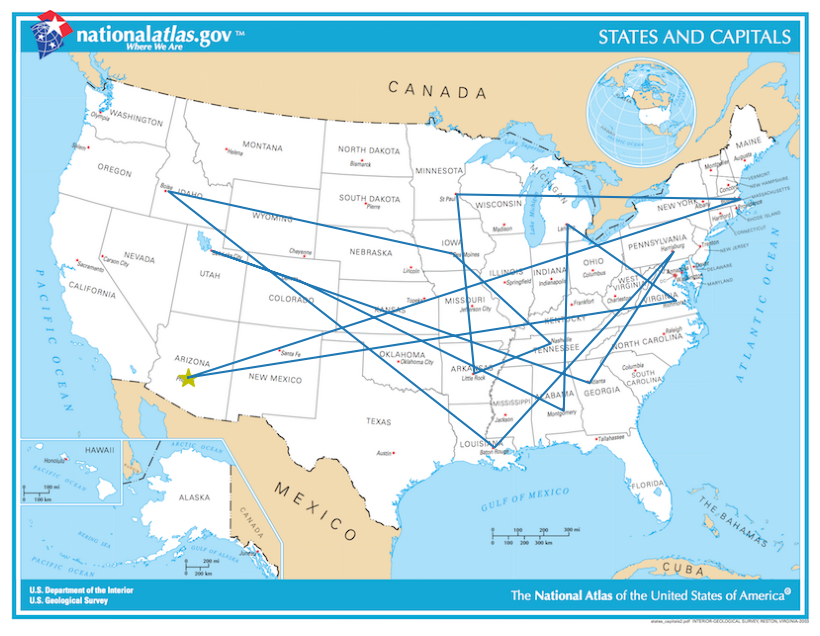

In [6]:
# Create the problem instance and plot the initial state
capitals_tsp = TravelingSalesmanProblem(capitals_subset)
starting_city = capitals_subset[0]
print("Initial path value: {:.2f}".format(capitals_tsp.evaluate()))
show_path(capitals_tsp.coords, starting_city)

In [ ]:
starting_city

In [12]:
# Set the decay rate (alpha) and initial temperature parameters, then run simulated annealing to solve the TSP
avg_time = 0
num_replicates = 10
schedule = Schedule(method="exponential",
                    alpha=0.30, # Vary this!
                    starting_temp= 4000) # Vary this!

for _ in range(num_replicates):
    start = time.perf_counter()
    result = simulated_annealing(capitals_tsp, schedule, max_iter=np.inf, random_state=192, verbose=False)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Best path length: 4393.60
Average time taken: 9.47


## Section 2
---

In this section, you will use linear multiplicative decay to compare its performance against exponential decay. For quick reference, cooling via linear decay is calculated as:

$T_k \leftarrow \frac{T_0}{1+\alpha*k}$

Where $T_0$ is the starting temp, $\alpha$ is the decay rate, and $T_k$ is the temperature at time step $k$.

In [18]:
# Set the decay rate (alpha) and initial temperature parameters, then run simulated annealing to solve the TSP
avg_time = 0
num_replicates = 10
schedule = Schedule(method="linear",
                    alpha=0.30, # Vary this!
                    starting_temp=2000) # Vary this!

for _ in range(num_replicates):
    start = time.perf_counter()
    result = simulated_annealing(capitals_tsp, schedule, stop_temp=1, max_iter=1e10, random_state=192, verbose=True)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Terminated with temperature T=1
At iteration #6,665.
Best path length: 2477.60
Average time taken: 2020.60


## Section 3

Here you will experiment with the best found parameters for simulated annealing against hill climbing as the size of the problem grows.

In [25]:
capitals_subset = generate_TSP(num_cities=30,    # Vary the number of cities here
                               random_state=254)


print(" → ".join([city[0] for city in capitals_subset]))
capitals_tsp = TravelingSalesmanProblem(capitals_subset)
starting_city = capitals_subset[0]
print("Initial path value: {:.2f}".format(capitals_tsp.evaluate()))

Columbia → Saint Paul → Albany → Richmond → Hartford → Nashville → Baton Rouge → Oklahoma City → Trenton → Little Rock → Sacramento → Salt Lake City → Atlanta → Harrisburg → Jackson → Columbus → Boston → Denver → Phoenix → Boise → Austin → Indianapolis → Des Moines → Madison → Salem → Raleigh → Tallahassee → Providence → Lansing → Montgomery
Initial path value: 8790.40


Then perform simulated annealing using whatever best parameters (cooling schedule, starting temp, alpha) were found from the previous experiments:

In [26]:
avg_time = 0
num_replicates = 10
schedule = Schedule(method="exponential", # Change this to your best found value!
                    alpha=0.95, # Change this to your best found value!
                    starting_temp=4000) # Change this to your best found value!

for _ in range(num_replicates):
    start = time.perf_counter()
    result = simulated_annealing(capitals_tsp, schedule, max_iter=np.inf, random_state=192, verbose=False)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Best path length: 5764.00
Average time taken: 490.34


Then perform hill climbing on the same problem instance:

In [27]:
avg_time = 0
num_replicates = 10

for _ in range(num_replicates):
    start = time.perf_counter()
    result = hill_climbing(capitals_tsp)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Best path length: 7619.20
Average time taken: 23.94


## Section 4

In [28]:
capitals_subset = generate_TSP(num_cities=5,    # Vary the number of cities here
                               random_state=257)


print(" → ".join([city[0] for city in capitals_subset]))
capitals_tsp = TravelingSalesmanProblem(capitals_subset)
starting_city = capitals_subset[0]
print("Initial path value: {:.2f}".format(capitals_tsp.evaluate()))

Madison → Providence → Boise → Atlanta → Richmond
Initial path value: 1884.00


In [29]:
avg_time = 0
num_replicates = 10

schedule = Schedule(method="exponential",
                    alpha=1,
                    starting_temp=1e-15)

for _ in range(num_replicates):
    start = time.perf_counter()
    result = simulated_annealing(capitals_tsp, schedule, stop_temp=0, max_iter=5e3, random_state=192, verbose=False)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Best path length: 1539.20
Average time taken: 254.07


In [30]:
avg_time = 0
num_replicates = 10

for _ in range(num_replicates):
    start = time.perf_counter()
    result = hill_climbing(capitals_tsp)
    avg_time += (time.perf_counter()-start)*1e3 # Record the time in milliseconds

avg_time /= num_replicates

print("Best path length: {:.2f}".format(result.evaluate()))
print("Average time taken: {:.2f}".format(avg_time))

Best path length: 1572.00
Average time taken: 1.41
